In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
dataset = pd.read_csv('dataset/iris.data', names=cols)
dataset.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12      

In [16]:
# Testing for missing Data
print(dataset.isnull().values.any(), '\n')
print(dataset.isnull().sum())

False 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [102]:
# Testing for encoded input variables
print(dataset.info()) # ALl our input variables are float64 (num)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [106]:
print(dataset.min())
print(dataset.max())

sepal_length            4.3
sepal_width               2
petal_length              1
petal_width             0.1
class           Iris-setosa
dtype: object
sepal_length               7.9
sepal_width                4.4
petal_length               6.9
petal_width                2.5
class           Iris-virginica
dtype: object


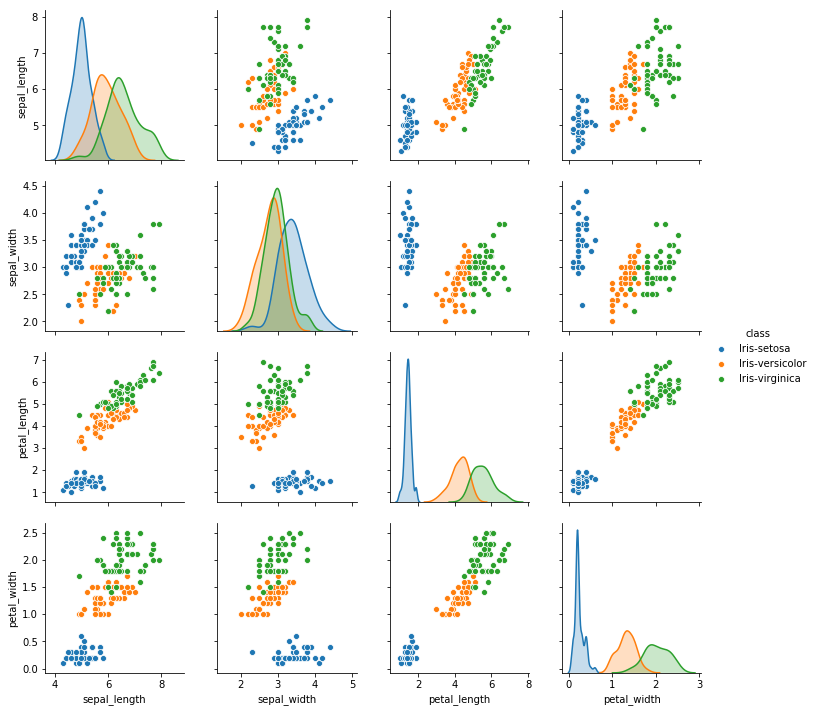

In [29]:
# visualizing scatter matrix
import seaborn as sns
sns.pairplot(dataset, hue="class")

In [30]:
# Splitting target and input variables

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,  -1].values

In [31]:
# Enocding target variable as num

from sklearn.preprocessing import LabelEncoder 
label_encoder_y = LabelEncoder()

# print(y[:20])
print(np.unique(y))

y = label_encoder_y.fit_transform(y)
# print(y[:20])
print(np.unique(y))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 1 2]


In [33]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

105
45
105
45


In [47]:
# Scaling Input variables
# Standardization (x - mean)/stdev
# Normalization (x - min)/(max - min)

from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train) #Here we fit AND transform
X_test  = scaler_X.transform(X_test) #Here we only transform

# Do we scale the target?
# NOT in classification (categorical variable)
# But in regression, YES

print(X_train)
print(X_test)

[[-1.02366372 -2.37846268 -0.18295039 -0.29145882]
 [ 0.69517462 -0.10190314  0.93066067  0.73721938]
 [ 0.92435306  0.58106472  1.04202177  1.6373128 ]
 [ 0.1222285  -1.92315077  0.6522579   0.35146505]
 [ 0.92435306 -1.24018291  1.09770233  0.73721938]
 [-0.33612839 -1.24018291  0.03977182 -0.16287405]
 [ 2.07024529 -0.10190314  1.26474398  1.38014325]
 [ 0.46599617  0.58106472  0.48521625  0.48004983]
 [-0.45071761 -1.46783886 -0.01590873 -0.16287405]
 [ 0.46599617 -0.784871    0.59657735  0.73721938]
 [ 0.46599617 -0.55721505  0.70793846  0.35146505]
 [-1.13825295 -1.24018291  0.37385514  0.6086346 ]
 [ 0.46599617 -1.24018291  0.6522579   0.86580415]
 [ 1.26812073  0.35340877  0.48521625  0.22288028]
 [ 0.69517462 -0.10190314  0.76361901  0.99438893]
 [ 0.1222285   0.80872067  0.37385514  0.48004983]
 [-1.25284217  0.12575281 -1.24088089 -1.32013702]
 [-0.10694994 -0.784871    0.70793846  0.86580415]
 [-0.33612839 -0.784871    0.20681348  0.0942955 ]
 [-0.33612839 -0.32955909 -0.12

In [48]:
print(X_train.shape, y_train.shape)

temp_data = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
print(temp_data)


dataset_train=pd.DataFrame(data=temp_data[0:,0:], index=[i for i in range(temp_data.shape[0])], columns=cols)

print(dataset_train)

(105, 4) (105,)
[[-1.02366372 -2.37846268 -0.18295039 -0.29145882  1.        ]
 [ 0.69517462 -0.10190314  0.93066067  0.73721938  2.        ]
 [ 0.92435306  0.58106472  1.04202177  1.6373128   2.        ]
 [ 0.1222285  -1.92315077  0.6522579   0.35146505  2.        ]
 [ 0.92435306 -1.24018291  1.09770233  0.73721938  2.        ]
 [-0.33612839 -1.24018291  0.03977182 -0.16287405  1.        ]
 [ 2.07024529 -0.10190314  1.26474398  1.38014325  2.        ]
 [ 0.46599617  0.58106472  0.48521625  0.48004983  1.        ]
 [-0.45071761 -1.46783886 -0.01590873 -0.16287405  1.        ]
 [ 0.46599617 -0.784871    0.59657735  0.73721938  2.        ]
 [ 0.46599617 -0.55721505  0.70793846  0.35146505  2.        ]
 [-1.13825295 -1.24018291  0.37385514  0.6086346   2.        ]
 [ 0.46599617 -1.24018291  0.6522579   0.86580415  2.        ]
 [ 1.26812073  0.35340877  0.48521625  0.22288028  1.        ]
 [ 0.69517462 -0.10190314  0.76361901  0.99438893  2.        ]
 [ 0.1222285   0.80872067  0.37385514  

C:\Users\stephane.kibonge.PARSEC\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\stephane.kibonge.PARSEC\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


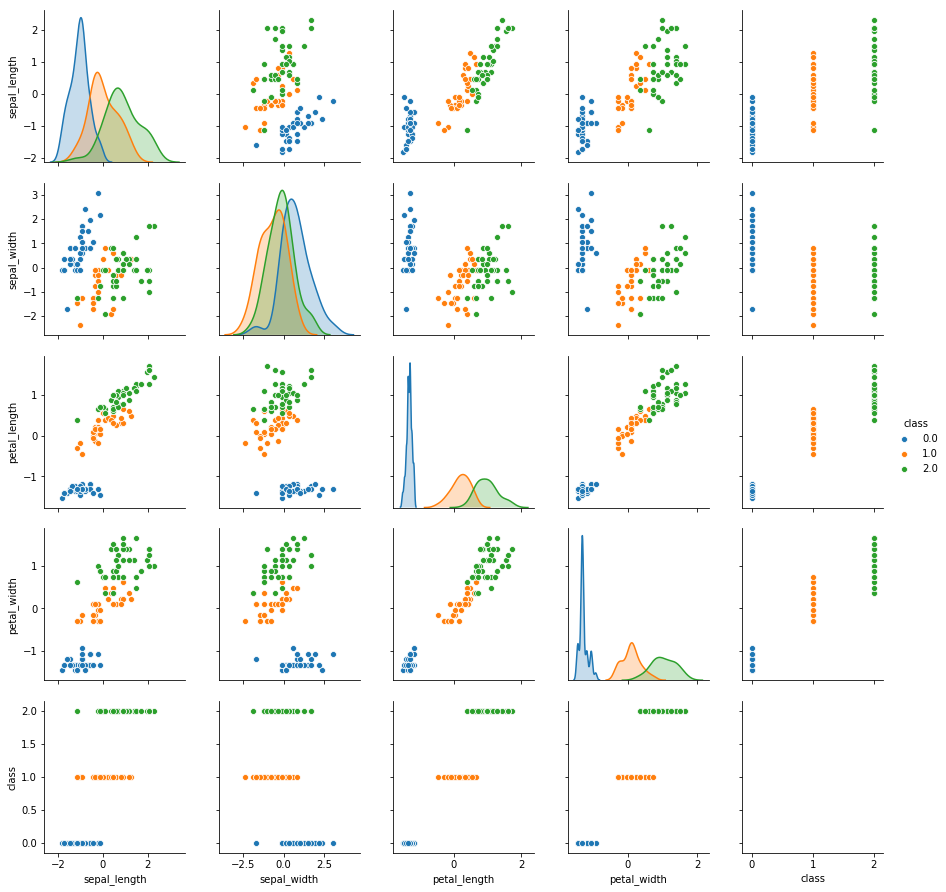

In [49]:
# visualizing scatter matrix
import seaborn as sns
sns.pairplot(dataset_train, hue="class")

In [50]:
# Fit Regressor
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


# predict on test set 
y_pred = classifier.predict(X_test)
for idtg in range(len(y_pred)):
    print("{0:.0f}\t\t{1:.0f}".format(y_test[idtg], y_pred[idtg]))

2		2
1		1
0		0
2		2
0		0
2		2
0		0
1		2
1		1
1		1
2		1
1		2
1		1
1		1
1		1
0		0
1		2
1		1
0		0
0		0
2		2
1		2
0		0
0		0
2		2
0		0
0		0
1		1
1		1
0		0
2		2
1		2
0		0
2		2
2		2
1		1
0		0
1		2
1		2
1		1
2		2
0		0
2		2
0		0
0		0


C:\Users\stephane.kibonge.PARSEC\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stephane.kibonge.PARSEC\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [51]:
# plot confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 11,  7],
       [ 0,  1, 10]], dtype=int64)

In [93]:
diags = [cm[i,i] for i in range(3)]
print('Accuracy ', 100 * np.array(diags).sum() / cm.sum(), '%\n')

# https://en.wikipedia.org/wiki/Precision_and_recall

# Type 1 error: I say it's positive but it wasn't (reckless?)
# Type 2 error: I say it's negative but it isn't (conservative)
#              truth        truth
# predictions: True Pos     type 1 err
# predictions: type 2 Err   True Neg

# True positive rate (TPR), Recall, Sensitivity, probability of detection, Power
# False positive rate (FPR), Fall-out, probability of false alarm 
print('How much of the truth of a class did I capture: \n', [100 * cm[j,j]/(cm[:,j].sum()) for j in range(3)], '%\n')

# Positive predictive value (PPV), Precision
# False omission rate (FOR)
print('How much truth was in my predictions about a class: \n', [100 * cm[j,j]/(cm[j,:].sum()) for j in range(3)], '%\n')

# interesting to view this as 2 implications
# when a class occurs (without me knowing), how often do i predict that it's occurred? |
# when i predict that a class occurs, how often am i right? - 

Accuracy  82.22222222222223 %

How much of the truth of a class did I capture: 
 [100.0, 91.66666666666667, 58.8235294117647] %

How much truth was in my predictions about a class: 
 [100.0, 61.111111111111114, 90.9090909090909] %



In [81]:
diags = [cm[j,j]/(cm[0,j] + cm[1,j] + cm[2,j])for j in range(3)]
print(diags)

[1.0, 0.9166666666666666, 0.5882352941176471]


In [83]:
TPR = [100 * cm[j,j]/(cm[:,j].sum()) for j in range(3)] 
print(diags)

[100.0, 91.66666666666667, 58.8235294117647]


In [90]:
cm.sum()


45

In [94]:
test = [1,2,0,1,2,1] 

In [95]:
cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [98]:
cols[for i in test]

SyntaxError: invalid syntax (<ipython-input-98-5294c83d81d4>, line 1)

In [99]:
[for i in test]

SyntaxError: invalid syntax (<ipython-input-99-eaa438dbb301>, line 1)

In [100]:
[i for i in test]

[1, 2, 0, 1, 2, 1]

In [101]:
[cols[i] for i in test]

['sepal_width',
 'petal_length',
 'sepal_length',
 'sepal_width',
 'petal_length',
 'sepal_width']